# Ejercicio de Trabajo en Clases 06: YOLOv5 - Detección de Mascarilla

<font color='red'>No se aceptan soluciones que usen metodologías distintas a las vistas en clases.</font>

<font color='orange'>Está permitido usar los códigos de los ejemplos vistos en clases.</font>



En este ejercicio se debe entrenar y probar un modelo de detección de mascarillas usando YOLOv5.

<font color='red'>La solución debe basarse en los ejemplos vistos en clases.</font>






# 0) Cambiar el nombre del archivo

<font color='red'>WARNING-2: CAMBIA EL NOMBRE DEL ARCHIVO ipynb INCLUYENDO TU RUT</font>

Ejemplo, si tu RUT es 12.345.678-9, el nombre de este archivo debe cambiarse de "E06_Tu_Rut.ipynb" a "E06_12345678-9.ipynb"


# 1) Definición de la base de datos

(1 puntos)

Cargue la base de datos del ejemplo visto en clases que se encuentra en

`https://www.dropbox.com/s/mbtbb80wglvtcg2/YOLOimages_eye_mouth.zip`.


In [1]:
!wget https://www.dropbox.com/s/mbtbb80wglvtcg2/YOLOimages_eye_mouth.zip
!unzip -qq YOLOimages_eye_mouth.zip

--2022-10-07 00:48:32--  https://www.dropbox.com/s/mbtbb80wglvtcg2/YOLOimages_eye_mouth.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/mbtbb80wglvtcg2/YOLOimages_eye_mouth.zip [following]
--2022-10-07 00:48:32--  https://www.dropbox.com/s/raw/mbtbb80wglvtcg2/YOLOimages_eye_mouth.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2335d8312a3241c6ac095fb0cd.dl.dropboxusercontent.com/cd/0/inline/BuW2OgZGL2KTJfnqCv7zuiwQLIctB1nbhXbZWFOah-RkzgHF_fbH3g6p7VCDY9Zuj4ZJjNxcimxrxMV_k59PDNuCgNHlg7pxVMGfmpurT9VBBPCUU6IZ5F4lg9iKfLHYaCy-ULffUMwJia-Rrb3TEbNJMxjkW40eHsXmQF0mHz8Tsg/file# [following]
--2022-10-07 00:48:32--  https://uc2335d8312a3241c6ac095fb0cd.dl.dropboxusercontent.com/cd/0/inline/BuW2OgZGL2KTJfnqCv7zuiwQLIctB1nbhXbZWFOah-Rk

# 2) Anotaciones de bounding boxes y clases

(3 puntos)

Crear un archivo `csv` que contenga las anotaciones y las clases y carguela un variable dataframe llamada `df` (de la librería pandas). Observe que en esta base de datos hay 198 imágenes a color de 33 personas. Cada persona tiene 3 fotos sin mascarilla y 3 fotos con mascarilla. El tamaño de cada imagen es de 256x256 pixeles. El nombre de las imágenes es `FM000xxx_nn.jpg`, donde `xxx` es el ID de la persona, y `nn` es el número de la foto de la persona, con `nn = 1,...6`. 

<font color='orange'>Las tres primeras fotos `nn=1,2,3` de la persona son sin mascarilla, mientras que las últimas tres `nn=4,5,6` son con mascarilla.</font>

<font color='red'>NO HACER ANOTACIÓN MANUAL:</font> como las caras en esta base de datos están centradas, asuma que TODAS las mascarillas están en la posición `x1 = 50`, `x2 = 206`, 	` y1 = 110`, `y2 = 226`. (esto no es perefecto pero es una muy buena aproximación práctica).

No olvidar que en este problema sólo hay una clase que detectar, y que esta clase es la clase `0`.


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

In [3]:
df = pd.DataFrame(columns = ['File', 'x1', 'x2', 'y1', 'y2', 'c'])

j=0
for img in sorted(os.listdir('/content/images'))[1:]:
  if int(img[-6:-4])>3:
    df.loc[j] = [img, 50, 206, 110, 226, 0]
    j+=1

df = df[df['c']==0].reset_index(drop=True)

In [4]:
df

,File,x1,x2,y1,y2,c
0,FM000008_04.jpg,50,206,110,226,0
1,FM000008_05.jpg,50,206,110,226,0
2,FM000008_06.jpg,50,206,110,226,0
3,FM000009_04.jpg,50,206,110,226,0
4,FM000009_05.jpg,50,206,110,226,0
...,...,...,...,...,...,...
94,FM000163_05.jpg,50,206,110,226,0
95,FM000163_06.jpg,50,206,110,226,0
96,FM000164_04.jpg,50,206,110,226,0
97,FM000164_05.jpg,50,206,110,226,0


# 2.1) Despliegue una imagen de ejemplo con bounding box

(1 punto)

Despliegue una imagen de la base de datos mostrando un bounding box con la mascarilla.

In [5]:
import os, fnmatch

def dirfiles(img_path,img_ext):
    img_names = fnmatch.filter(sorted(os.listdir(img_path)),img_ext)
    return img_names

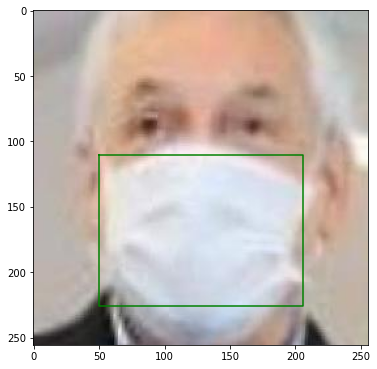

In [6]:
# Despliegue de los bounding boxes anotados para la imagen i
d = dirfiles('images/','*.jpg')
i  = 15 # ID de la foto a desplegar
fname = d[i] # nombre de imagen i

X = cv2.imread('images/'+fname)
plt.figure(figsize=(6,8))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))

n = len(df)
# filas que contienen la imagen con nombre fname 
for k in range(n):
  if df.File[k] == fname:
    x1 = df.x1[k]
    x2 = df.x2[k]
    y1 = df.y1[k]
    y2 = df.y2[k]
    plt.plot([x1,x1,x2,x2,x1],[y1,y2,y2,y1,y1],c='g')

plt.show()

# 3) Genere los archivos para los formatos adecuados de YOLOv5

(1 punto)

Genere los archivos de texto en el formato adecuado de YOLO con las coordenadas normalizadas de los bounding boxes y el número de la clase de las imágenes que contienen mascarilla. Los archivos de texto deben guardarse en el directorio `labels`.

In [7]:
!mkdir labels

In [8]:
from tqdm.auto import tqdm
m = len(d) # numero de imagenes
n = len(df) # numero de bounding boxes

# en boundingbox.csv las clases son dos (0: mascarilla, 1:no mascarilla)


for i in tqdm(range(m)):
  fname = d[i]
  X = cv2.imread('images/'+fname)
  N = X.shape[0]
  M = X.shape[1]
  # filas que contienen la imagen con nombre fname
  ok = 0
  for k in range(n):
    tname = fname[:-3]+'txt'
    if df.File[k] == fname:
      x1 = df.x1[k]
      x2 = df.x2[k]
      y1 = df.y1[k]
      y2 = df.y2[k]
      c  = df.c[k]
      wn = (x2-x1)/M
      hn = (y2-y1)/N
      xn = (x1+x2)/2/M
      yn = (y1+y2)/2/N
      if ok == 0:
        f = open('labels/'+tname,'w+')
        ok = 1
      f.write(str(c)+' '+str(xn)+' '+str(yn)+' '+str(wn)+' '+str(hn)+'\n')
  if ok:
    f.close()

  0%|          | 0/198 [00:00<?, ?it/s]

# 4) Definición de subconjuntos de Training/Validation/Testing

(1 punto)

Divida las imágenes del dataset de la siguiente manera:

* las primeras 125 imágenes para el training,

* las siguientes 14 para validation,

* las últimas 59 para el testing.


Las imágenes (con sus archivos de texto de los labels correspondientes) deben ser copiados en los siguientes directorios:



```
data
   |——————images
   |        └——————train —— <trainimage01>.jpg
   |        |               <trainimage02>.jpg
   |        |                      :
   |        └——————val   —— <valimage01>.jpg
   |        |               <valimage02>.jpg
   |        |                      :
   |        └——————test —— <testimage01>.jpg
   |        |               <testimage02>.jpg
   |        |                      :
   └——————labels
   |        └——————train —— <trainimage01>.txt
   |        |               <trainimage02>.txt
   |        |                      :
   |        └——————val   —— <valimage01>.txt
   |        |               <valimage02>.txt
   |        |                      :
   |        └——————test —— <testimage01>.txt
   |        |               <testimage02>.txt
   |        |                      :
```


In [9]:
!mkdir data
!mkdir data/images
!mkdir data/images/train
!mkdir data/images/val
!mkdir data/images/test
!mkdir data/labels
!mkdir data/labels/train
!mkdir data/labels/val
!mkdir data/labels/test

In [10]:
import numpy as np

In [11]:
p_train = 0.70  # 70% del total de los datos son training
p_val   = 0.10  # 10% de los datos de training son de validación

d = dirfiles('images/','*.jpg')
m = len(d) # número de imagenes

nt = round(p_train*m)
nv = round(p_val*nt)

ii = np.vstack([np.zeros((nt-nv,1)),np.ones((nv,1)),2*np.ones((m-nt,1))])

target = ['train','val','test']

for i in tqdm(range(m)):
  fname            = d[i]
  tname            = fname[:-3]+'txt'
  ti               = target[int(ii[i])]
  source_file      = 'images/'+fname
  destination_file = 'data/images/'+ti 
  os.system('cp ' + source_file + ' ' + destination_file) 
  source_file      = 'labels/'+tname
  destination_file = 'data/labels/'+ti 
  os.system('cp ' + source_file + ' ' + destination_file) 

print('Training: ', nt-nv)
print('     Val: ', nv)
print(' Testing: ',m-nt)

  0%|          | 0/198 [00:00<?, ?it/s]

Training:  125
     Val:  14
 Testing:  59


# 5) Defina el archivo YAML para este problema

Defina el archivo `data/data.yaml` que contiene la información de: 

* los directorios de training, validation y testing

* el nombre de las clases

* el número de clases

In [12]:
PATH_TRAIN = 'data/images/train'
PATH_VAL   = 'data/images/val'
PATH_TEST  = 'data/images/test'
N_CLASSES  = 1 # 0: mascarilla

class_names = ['mascarilla']


f = open('data/data.yaml','w+')

f.write('train: ../'+PATH_TRAIN+'\n')
f.write('val:   ../'+PATH_VAL+'\n')
f.write('test:  ../'+PATH_TEST+'\n')
f.write('nc:  '+str(N_CLASSES)+'\n')
f.write('names:  '+str(class_names)+'\n')

f.close()


# 6) Instale YOLOv5

(1 punto)

In [13]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     |████████████████████████████████| 1.6 MB 8.2 MB/s 


In [14]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13478, done.
remote: Counting objects: 100% (280/280), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 13478 (delta 201), reused 249 (delta 180), pack-reused 13198
Receiving objects: 100% (13478/13478), 13.24 MiB | 29.16 MiB/s, done.
Resolving deltas: 100% (9265/9265), done.


In [15]:
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)

In [16]:
%cd yolov5

/content/yolov5


# 7) Defina las variables necesarias para el entrenamiento de YOLOv5

(1 punto)

Defina las siguientes variables: 

* `YOLO_MODEL` : para usar modelo "yolov5s"

* `EPOCHS`: para 100 épocas

* `CFG`: con el nombre del archivo YAML de este modelo

* `TRAIN_WEIGHTS`: con el nombre del archivo `pt` que contiene los pesos pre-entrenados de este modelo

* `BATCH`: para que entrene con un batch de 8

* `IMG_SIZE`: con el tamaño de la imágen

* `YAMLFILE`: con el path del archivo `data.yaml` diseñado para este problema en el paso 5).

In [17]:
YOLO_MODEL     = 'yolov5s' # puede ser yolov5m, yolov5l, yolov5x
EPOCHS         = 100
CFG            = YOLO_MODEL+'.yaml'
TRAIN_WEIGHTS  = YOLO_MODEL+'.pt'  # o pesos de otro modelo propio pre-entrenado
BATCH          = 8
IMG_SIZE       = 256
YAMLFILE       = '../data/data.yaml'

#8) Entrene YOLOv5

(2 puntos)

Entre el modelo YOLOv5 usando las variables definidas en el paso anterior. 

<font color='orange'>Asegúrese que Colab esté usando GPU.</font>




In [18]:
!python train.py --img {IMG_SIZE} --batch {BATCH} --epochs {EPOCHS} --data {YAMLFILE} --cfg {CFG} --weights {TRAIN_WEIGHTS} --nosave --cache

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=../data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=256, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-187-g5ef69ef Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=

# 10) Detección en el testing

(2 puntos)

Pruebe el modelo en las imágenes del testing, y despliegue los resultados para la imagen `FM000155_04.jpg`


In [19]:
TEST_WEIGHTS = 'runs/train/exp/weights/last.pt'  # ver path en las ultimas lineas de la ejecución anterior
PATH_TEST    = '../data/images/test'

In [20]:
!python detect.py --weights {TEST_WEIGHTS} --img 256 --conf 0.4 --source  {PATH_TEST}

detect: weights=['runs/train/exp/weights/last.pt'], source=../data/images/test, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-187-g5ef69ef Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/59 /content/data/images/test/FM000145_02.jpg: 256x256 (no detections), 17.8ms
image 2/59 /content/data/images/test/FM000145_03.jpg: 256x256 (no detections), 17.4ms
image 3/59 /content/data/images/test/FM000145_04.jpg: 256x256 1 mascarilla, 15.4ms
image 4/59 /content/data/images/test/FM000145_05.jpg: 256x256 1 mascarilla, 20.3ms
image 5

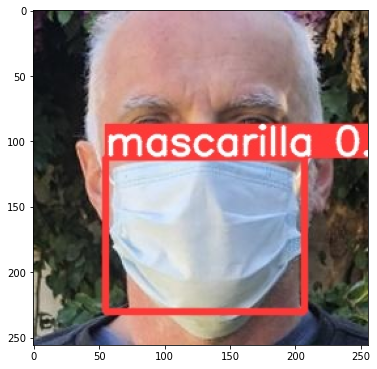

In [21]:
X = cv2.imread('runs/detect/exp/FM000155_04.jpg') # ver path en las ultimas lineas de la ejecución anterior

plt.figure(figsize=(6,8))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.show()

# 11) Estadísticas en testing

(2 puntos)

Grafique la curva de precision-recall del testing con el valor `mAP`

In [22]:
!python val.py --weights {TEST_WEIGHTS} --data {YAMLFILE} --img {IMG_SIZE} --iou 0.25 --half

val: data=../data/data.yaml, weights=['runs/train/exp/weights/last.pt'], batch_size=32, imgsz=256, conf_thres=0.001, iou_thres=0.25, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.2-187-g5ef69ef Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/content/data/labels/val.cache' images and labels... 7 found, 7 missing, 0 empty, 0 corrupt: 100% 14/14 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:00<00:00,  4.86it/s]
                   all         14          7       0.99          1      0.995      0.772
Speed: 0.0ms pre-process, 6.0ms inference, 1.1ms NMS per image at shape (32, 3, 256, 256)
Results saved to runs/

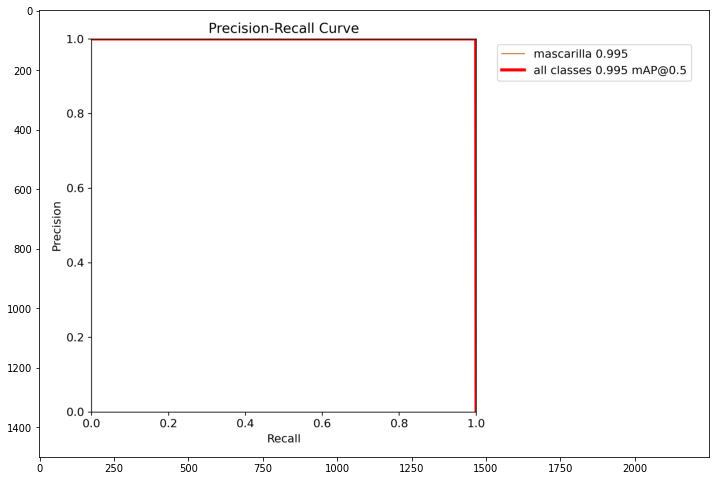

In [23]:
I = cv2.imread('runs/val/exp/PR_curve.png') # ver path en las ultimas lineas de la ejecución anterior
plt.figure(figsize=(12,12))
plt.imshow(I)
plt.show()

# 12) Pruebe el modelo con una imagen nueva

(2 puntos)

Verifique la efectividad del modelo de detección de mascarillas entrenado en este ejercicio con la imagen disponible en `https://www.dropbox.com/s/vrquzkxagy7vyi1/testface.png` 

In [24]:
!wget https://www.dropbox.com/s/vrquzkxagy7vyi1/testface.png

--2022-10-07 00:52:51--  https://www.dropbox.com/s/vrquzkxagy7vyi1/testface.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/vrquzkxagy7vyi1/testface.png [following]
--2022-10-07 00:52:51--  https://www.dropbox.com/s/raw/vrquzkxagy7vyi1/testface.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5e910b140b62bace8d83b4e764.dl.dropboxusercontent.com/cd/0/inline/BuUjMijbtcGesv0tcDM92guCmKsdGUkunQC3Ed0d7nv7YlqLgfmVSVMbBkZegCWjJFVJEYWjy-tMLHBu-QTTHhav5YD8ru1Mua4LYdiqBnlJcf9oF8QdsDv2CVJAlmrGEPxIvpatPK1I7LK_bfD4tdz_DrPqAPiZqoMHVI91CtWj0w/file# [following]
--2022-10-07 00:52:52--  https://uc5e910b140b62bace8d83b4e764.dl.dropboxusercontent.com/cd/0/inline/BuUjMijbtcGesv0tcDM92guCmKsdGUkunQC3Ed0d7nv7YlqLgfmVSVMbBkZegCWjJFVJEYWjy-tMLHBu

In [25]:
NEW_PATH_TEST = '../newtest'
TEST_IMAGE    = 'testface.png'

In [26]:
!mkdir {NEW_PATH_TEST}

In [27]:
!cp {TEST_IMAGE} {NEW_PATH_TEST}

In [28]:
!python detect.py --weights {TEST_WEIGHTS} --img 256 --conf 0.4 --source  {NEW_PATH_TEST} --save-txt

detect: weights=['runs/train/exp/weights/last.pt'], source=../newtest, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-187-g5ef69ef Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/newtest/testface.png: 256x256 1 mascarilla, 11.5ms
Speed: 0.2ms pre-process, 11.5ms inference, 1.7ms NMS per image at shape (1, 3, 256, 256)
Results saved to runs/detect/exp2
1 labels saved to runs/detect/exp2/labels


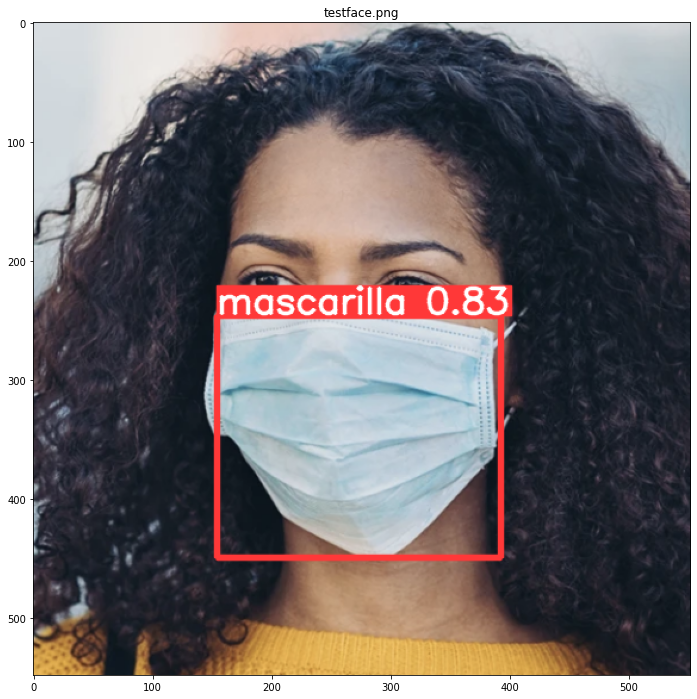

In [29]:
X = cv2.imread('runs/detect/exp2/'+TEST_IMAGE) # ver path en las ultimas lineas de la ejecución anterior
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(X, cv2.COLOR_BGR2RGB))
plt.title(TEST_IMAGE)
plt.show()

# <font color='red'>SUBIR EJERCICIO DE FORMA INDIVIDUAL A CANVAS</font> 

